In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### load data

In [2]:
Passed_Morning_Left = pd.read_csv('./Data/Morning_Shift_Passed',header=None,index_col=None)

In [3]:
Passed_Morning_Left.head()

,0,1
0,2018-10-05,7351
1,2018-10-06,0
2,2018-10-07,0
3,2018-10-08,240
4,2018-10-09,0


In [4]:
Passed_Morning_Left.columns=['Date_Time','Passed_Morning_Left']

In [5]:
Passed_Morning_Left.head()

,Date_Time,Passed_Morning_Left
0,2018-10-05,7351
1,2018-10-06,0
2,2018-10-07,0
3,2018-10-08,240
4,2018-10-09,0


In [6]:
Passed_Morning_Left['Date_Time'] = pd.to_datetime(Passed_Morning_Left['Date_Time'])
Passed_Morning_Left['Date_Time'].dt

In [7]:
Passed_Morning_Left.set_index('Date_Time', inplace=True)

In [8]:
Passed_Morning_Left.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2018-10-05 to 2019-04-18
Data columns (total 1 columns):
Passed_Morning_Left    196 non-null int64
dtypes: int64(1)
memory usage: 3.1 KB


#### line plot

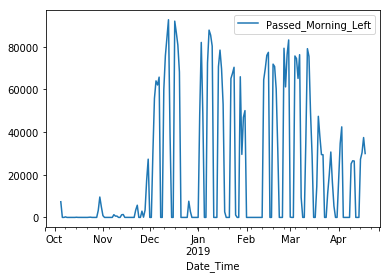

In [9]:
Passed_Morning_Left.plot()
plt.show()

#### Split the dataset to TRAIN Set AND TEST Set

In [10]:
percent_Train_set = 0.80

In [11]:
split_point = round(len(Passed_Morning_Left)*percent_Train_set)

In [12]:
train , test = Passed_Morning_Left[0:split_point], Passed_Morning_Left[split_point:]

In [13]:
print('The train %d, The test %d'% (len(train),(len(test))))

The train 157, The test 39


#### differenced series

In [28]:
def differenced(train,interval =1):
    diff = list()
    for i in range(interval, len(train)):
        value = train[i] - train[i - interval]
        diff.append(value)
    return np.array(diff)

#### invert differencing

In [29]:
def inverse_differencing(history ,yhat,interval =1):
    return yhat + history[-interval]

In [30]:
import numpy as pd
from statsmodels.tsa.arima_model import ARIMA

In [31]:
X = train.values

In [32]:
#Total_days = 30

In [33]:
differenced = differenced(X,30)

#### fit model

In [38]:
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

In [39]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  127
Model:                     ARMA(7, 1)   Log Likelihood               -1490.559
Method:                       css-mle   S.D. of innovations          30038.759
Date:                Fri, 11 Oct 2019   AIC                           3001.117
Time:                        08:05:24   BIC                           3029.559
Sample:                             0   HQIC                          3012.673
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8645.0709   9514.021      0.909      0.365      -1e+04    2.73e+04
ar.L1.y        0.3414      0.193      1.765      0.080      -0.038       0.721
ar.L2.y       -0.0036      0.154     -0.024      0.9

#### forecast

In [40]:
forecast = model_fit.forecast()[0]

In [41]:
forecast = inverse_differencing(X,forecast,30)

In [42]:
print('forecast: %f' %forecast)

forecast: 27752.581389


In [44]:
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [46]:
forecast = model_fit.forecast(steps=39)[0]

In [47]:
history = [x for x in X]

In [48]:
day = 1

In [49]:
for yhat in forecast:
    inverted = inverse_differencing(history,yhat,30)
    print('Day %d : %f' %(day,inverted))
    history.append(inverted)
    day +=1

Day 1 : 27752.581389
Day 2 : 49372.104583
Day 3 : 47745.050586
Day 4 : 104408.598783
Day 5 : 81328.884775
Day 6 : 76279.763564
Day 7 : 80411.378632
Day 8 : 17458.854756
Day 9 : 31856.128252
Day 10 : 104855.781872
Day 11 : 95840.662608
Day 12 : 70590.918835
Day 13 : 34666.730515
Day 14 : 4363.784162
Day 15 : 13121.243746
Day 16 : 21853.057731
Day 17 : 102576.752451
Day 18 : 79074.713724
Day 19 : 85737.898686
Day 20 : 87554.959594
Day 21 : 5642.740429
Day 22 : 10932.027146
Day 23 : 16231.265035
Day 24 : 93010.205760
Day 25 : 88480.438837
Day 26 : 74043.439910
Day 27 : 82073.266965
Day 28 : 15772.221873
Day 29 : 9791.615899
Day 30 : 13035.811399
Day 31 : 41514.161161
Day 32 : 61106.016878
Day 33 : 56391.239317
Day 34 : 111149.685208
Day 35 : 88477.982455
Day 36 : 85484.144032
Day 37 : 91611.177898
Day 38 : 29135.972768
Day 39 : 42313.515584


In [52]:
start_index = len(differenced)
end_index = start_index + 10
forecast = model_fit.predict(start=start_index,end=end_index)

In [54]:
for yhat in forecast:
    inverted = inverse_differencing(history,yhat,30)
    print('Day %d : %f' %(day,inverted))
    history.append(inverted)
    day +=1

Day 40 : 132608.363261
Day 41 : 145212.767191
Day 42 : 118335.969421
Day 43 : 74517.329298
Day 44 : 15906.668937
Day 45 : 13392.007310
Day 46 : 24842.436363
Day 47 : 120035.607207
Day 48 : 110930.841976
Day 49 : 118703.680558
Day 50 : 112630.622202
